<a href="https://colab.research.google.com/github/JaswanthRemiel/Tiktokanalysis/blob/main/TikTok_Sentiment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
**TikTok**, a platform revolutionizing short video consumption, garners diverse reactions. While it captivates some with humor, others remain indifferent or critical. Analyzing TikTok sentiments becomes pivotal for various reasons:
1. **Assessing User Sentiment:**
Understand user sentiments through reviews and comments.
Uncover the spectrum of experiences, discerning positives, negatives, likes, and dislikes.
2. **Application Enhancement:**
Aid developers in refining functionality and addressing user concerns.
Utilize feedback for iterative improvements, creating a user-centric platform.
3. **Business Strategy Adjustment:**
Enable businesses to align marketing strategies with prevailing sentiments on TikTok.
Adapt promotional approaches based on user reactions for enhanced engagement.

To delve into TikTok’s user sentiments, this article utilizes Python, leveraging its diverse modules for efficient sentiment analysis. If you’re keen on comprehending user responses to TikTok, follow along as we navigate through the steps of sentiment analysis in Python.

# Importing Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Terms :**

**WordCloud** : a library used to create text visualizations based on the number of times the words appear in them so it’s easy to understand.

**STOPWORDS** : a library used to remove unimportant words from documents or text, such as prepositions and conjunctions. The main goal in implementing the stop words process is to reduce the number of words in a document, which will affect the speed and performance of NLP (natural language processing).

**ImageColorGenerator** : a library that generates colors using images relevant to the text’s topic.

**The SentimentIntensityAnalyzer :** a library that analyzes sentiment in text. This library uses a score to determine if the text being analyzed falls into the positive, negative, or neutral category.

# Reading the data :

This second step is the most important part because, without relevant data, it can lead to inaccurate analysis. The dataset that we will use is a collection of TikTok reviews collected using API based on ratings on the Google Play Store. Now let’s look at the contents of the dataset.

In [ ]:
import pandas as pd
data = pd.read_csv("tiktok.csv")
print(data.head())


                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words    5.0            0.0   
1                              Great fun app so far!    5.0            0.0   
2  The app would get a higher rating b

It turns out that there are ten columns in the dataset, which include reviewId, userName, userImage, content, score, thumbsUpCount, reviewCreatedVersion, at, replyContent, and revisedAt. However, not all of the columns are used for sentiment analysis. We’ll talk about it in the next step.

# Data Preprocessing

Data preprocessing is a critical step in sentiment analysis. It involves cleaning and preparing data for analysis to ensure the accuracy and effectiveness of the sentiment analysis results. We will use some of the initialized libraries at this point. Preprocessing techniques include removing unwanted characters, such as punctuation, and converting all the text to lowercase to make the analysis process easier.

Another important step in data preprocessing is removing stop words, which are common words that are not essential in determining the sentiment of a text. Stop words can include words like “the,” “is,” and “and.” Removing these words can help reduce noise and improve the accuracy of the sentiment analysis.

Other preprocessing techniques include tokenization, which involves breaking up the text into individual words or phrases, and stemming or lemmatization, which involves reducing words to their base form to account for spelling and word usage variations.

Overall, proper data preprocessing is essential for conducting accurate and effective sentiment analysis, and it is an important step in any natural language processing task.

As I previously stated, we do not use all of the dataset columns. Only two columns will be used: content and score. Therefore, we will create a new dataset containing only two columns.

In [ ]:
data = data[["content", "score"]]
print(data.head())

At first glance at the dataset, I noticed some columns had null values. However, let’s check whether the two columns we use to analyze TikTok review sentiment have null values or not.



In [ ]:
print(data.isnull().sum())

reviewId                    0
userName                    0
userImage                   0
content                     1
score                       1
thumbsUpCount               1
reviewCreatedVersion     4063
at                          1
replyContent            14706
repliedAt               14706
dtype: int64


It turns out there are four null values in the content column and one in the score column. Let’s drop these null values and take our analysis further.

In [ ]:
data = data.dropna()

# Cleaning up the values
Now let’s prepare this data for the sentiment analysis task. Here, we need to clean up the text in the content column to ensure accurate analysis.

In [ ]:
stopword =set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["content"] = data["content"].apply(clean)

The Python code above defines a function named “clean,” which accepts a parameter named “text”. This function takes the input text and performs a series of text-cleaning operations on it to prepare it for sentiment analysis.

Here’s what each line of the function does:

1. **str(text).lower():** Converts all text to lowercase.

2. re.sub(‘\[.*?\]’, ”, text): **bold text** Removes any text inside square brackets, which is often used to denote tags or URLs.

3. **re.sub(‘https?://\S+|www\.\S+’, ”, text):** Removes any URLs.

4. re.sub(‘<.*?>+’, ”, text): **bold text** Removes any HTML tags.

5. **re.sub(‘[%s]’ % re.escape(string.punctuation), ”, text):** Removes any punctuation.

6. **re.sub(‘\n’, ”, text):** Removes any newlines.

7. **text = re.sub(‘\w*\d\w*’, ”, text):** Removes any words containing numbers.

8. **text = [word for word in text.split(‘ ‘) if word not in stopword]:** Removes any stop words, which are common words that don’t add much meaning to the text (e.g. “the”, “and”).

9. **” “.join(text):** Joins the remaining words back together into a single string.
10. **[stemmer.stem(word) for word in text.split(‘ ‘)]:** Applies stemming to the words in the text, which means reducing words to their base form (e.g., “running” becomes “run”).

11. **” “.join(text):** Joins the stemmed words back together into a single string.
12.** return text:** Returns the cleaned text as the output of the function.



# Ratings analysis

In [ ]:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px

figure = px.pie(data,
                values=quantity,
                names=numbers,hole = 0.5)
figure.show()

TikTok has garnered an impressive 74% of five-star ratings from users, with only 12.9% giving it a one-star rating. Let’s now take a closer look at the types of words used by TikTok reviewers.

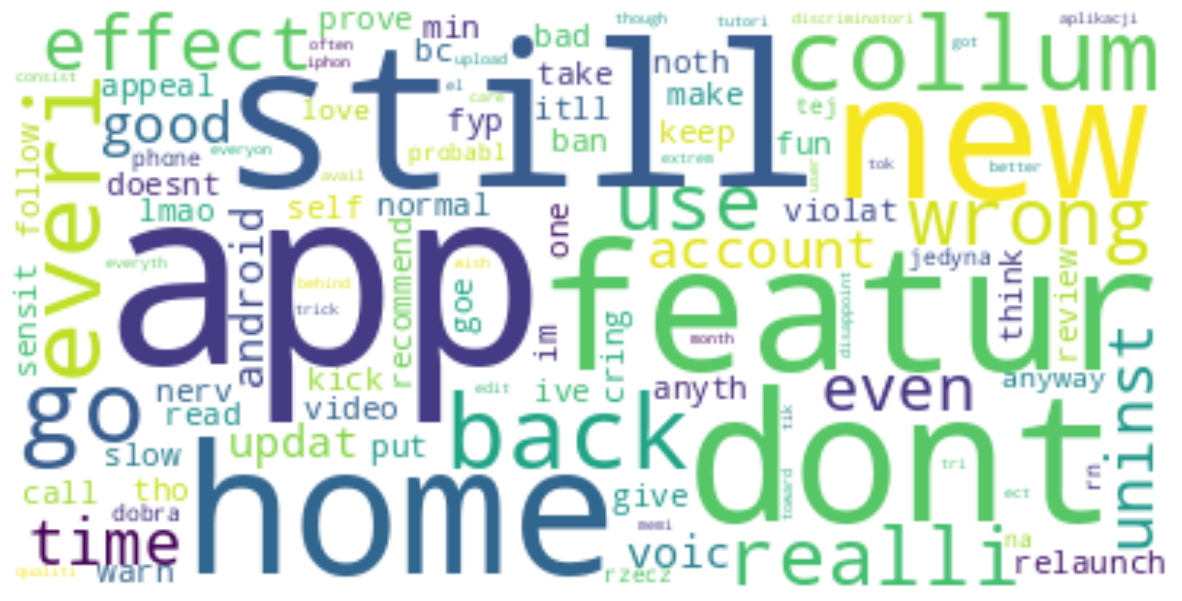

In [ ]:
import wordcloud
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis
We have now reached the final step, sentiment analysis. Firstly, we’ll transform the score column into three new columns: Positive, Negative, and Neutral, based on the sentiment score of each user review. This is done in order to acquire a thorough grasp of the review. Let’s get started.

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

                                                 content  Positive  Negative  \
5095   app one collum call home everi time think go g...     0.000     0.079   
5322   app good account get ban even tho dont anyth w...     0.205     0.128   
7187                     uninst self fun still recommend     0.659     0.000   
8720   lmao read  review im cring bad use sensit 😭 an...     0.329     0.142   
10801                                   good dont featur     0.592     0.000   

       Neutral  
5095     0.921  
5322     0.667  
7187     0.341  
8720     0.528  
10801    0.408  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Let’s now take a closer look at the type of words used in positive reviews of TikTok.

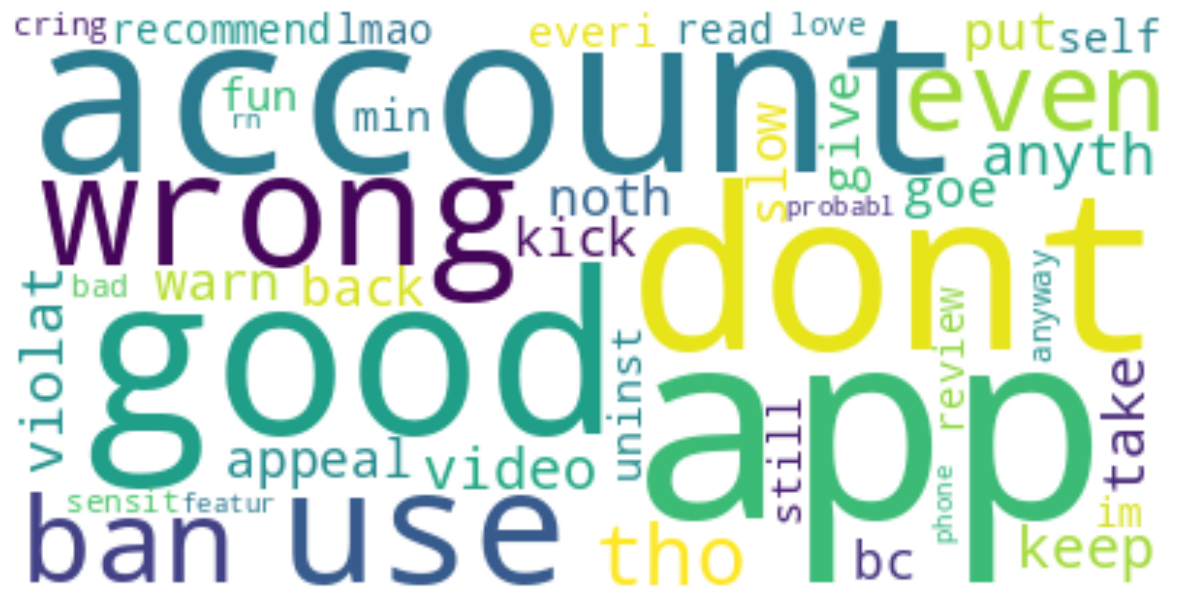

In [ ]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Let’s now explore the commonly used words in negative reviews of TikTok.

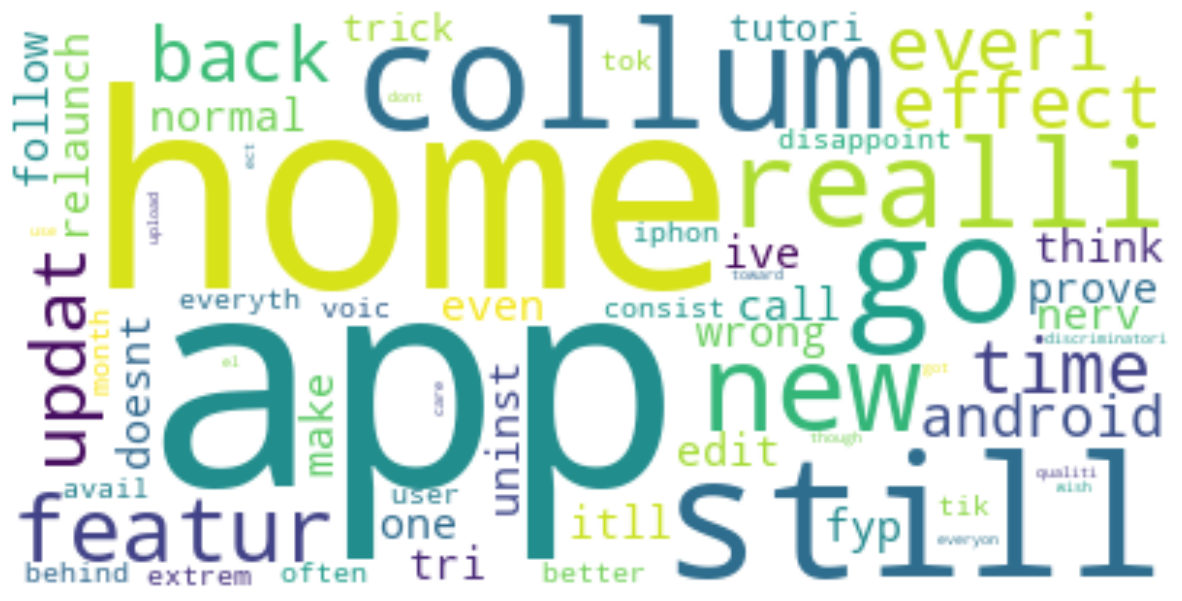

In [ ]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Provided data
data = {
    'content': [
        "app one collum call home everi time think go g...",
        "app good account get ban even tho dont anyth w...",
        "uninst self fun still recommend",
        "lmao read  review im cring bad use sensit 😭 an...",
        "good dont featur"
    ],
    'Positive': [0.000, 0.205, 0.659, 0.329, 0.592],
    'Negative': [0.079, 0.128, 0.000, 0.142, 0.000]
}

# Convert sentiment scores to binary labels
predicted_labels = [1 if pos_score >= 0.5 else 0 for pos_score in data['Positive']]

# Example ground truth labels (you need to provide these)
ground_truth = [0, 1, 1, 0, 1]  # Assuming these are the ground truth labels (0: Negative, 1: Positive)

# Calculate accuracy
accuracy = accuracy_score(ground_truth, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(ground_truth, predicted_labels)
print(f"Precision: {precision:.2f}")

# Calculate recall (sensitivity)
recall = recall_score(ground_truth, predicted_labels)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(ground_truth, predicted_labels)
print(f"F1-Score: {f1:.2f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(ground_truth, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.80
Precision: 1.00
Recall: 0.67
F1-Score: 0.80
Confusion Matrix:
[[2 0]
 [1 2]]


# Conclusion
TikTok has taken the world by storm with its short, amusing videos that people can’t get enough of. Hence we have performed sentimental analysis on tiktok user data generated from Google Play store.